In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'AAPL Stock Price'}, xlabel='Date'>

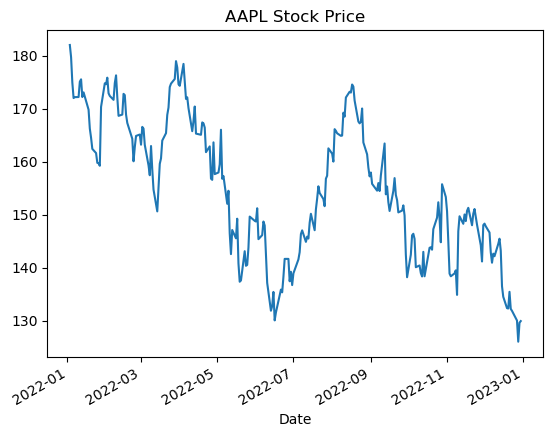

In [7]:
# 下載歷史價格數據
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data['Close'].plot(title=f'{ticker} Stock Price')

In [8]:
# 計算簡單移動平均線 (SMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

In [9]:
# 計算指數移動平均線 (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

In [12]:
# 生成交易信號
data['Signal'] = 0
data["Signal"]

Date
2022-01-03    0
2022-01-04    0
2022-01-05    0
2022-01-06    0
2022-01-07    0
             ..
2022-12-23    0
2022-12-27    0
2022-12-28    0
2022-12-29    0
2022-12-30    0
Name: Signal, Length: 251, dtype: int64

In [13]:
data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1, 0)
data["Signal"]

C:\Users\coset\AppData\Local\Temp\ipykernel_24820\2401820308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1, 0)


Date
2022-01-03    0
2022-01-04    0
2022-01-05    0
2022-01-06    0
2022-01-07    0
             ..
2022-12-23    0
2022-12-27    0
2022-12-28    0
2022-12-29    0
2022-12-30    0
Name: Signal, Length: 251, dtype: int64

In [15]:
data['Position'] = data['Signal'].diff()
data["Position"]

Date
2022-01-03    NaN
2022-01-04    0.0
2022-01-05    0.0
2022-01-06    0.0
2022-01-07    0.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: Position, Length: 251, dtype: float64

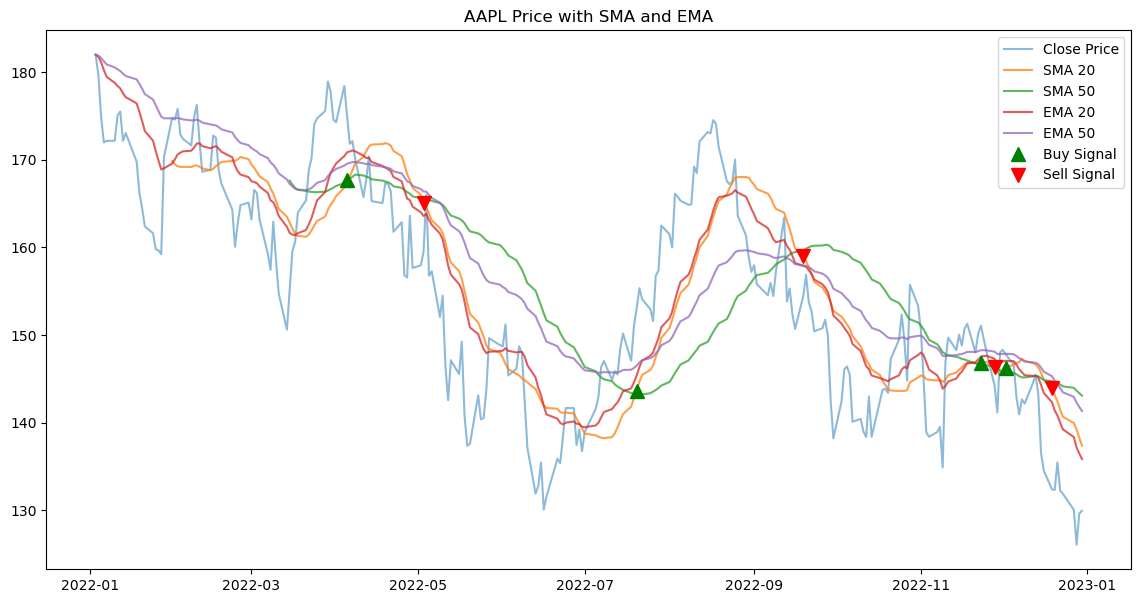

                 Close      SMA_20      SMA_50      EMA_20      EMA_50  \
Date                                                                     
2022-12-02  147.809998  146.213498  145.751799  147.055356  147.853437   
2022-12-05  146.630005  146.625998  145.675799  147.014846  147.805460   
2022-12-06  142.910004  146.825498  145.518599  146.623909  147.613481   
2022-12-07  140.940002  146.897498  145.302199  146.082585  147.351776   
2022-12-08  142.649994  147.286498  145.158399  145.755671  147.167392   
2022-12-09  142.160004  147.050999  145.151999  145.413227  146.971024   
2022-12-12  144.490005  146.790499  145.277799  145.325301  146.873729   
2022-12-13  145.470001  146.649999  145.338199  145.339082  146.818681   
2022-12-14  143.210007  146.308500  145.280399  145.136313  146.677164   
2022-12-15  136.500000  145.694000  145.082400  144.313807  146.278060   
2022-12-16  134.509995  144.883500  144.864000  143.380110  145.816567   
2022-12-19  132.369995  143.937500  14

In [11]:
# 畫出價格及移動平均線
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_20'], label='SMA 20', alpha=0.75)
plt.plot(data['SMA_50'], label='SMA 50', alpha=0.75)
plt.plot(data['EMA_20'], label='EMA 20', alpha=0.75)
plt.plot(data['EMA_50'], label='EMA 50', alpha=0.75)

# 畫出買入和賣出信號
plt.plot(data[data['Position'] == 1].index, data['SMA_20'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['SMA_20'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{ticker} Price with SMA and EMA')
plt.legend()
plt.show()

# 列出交易信號
print(data[['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'Signal', 'Position']].tail(20))